# Problems Disclaimer
The text itself mandates that no part of the book be reproduced without the publisher's explicit consent. As such, this notebook will not quote problems. Instead abreviated notes regarding the problems will be included with their solutions.

# Problem 1

* Sensor nominally reports ranges: 0m < *z* < 3m, uniformily distributed
* p(*faulty sensor*) = 0.01
* Faulty sensor readings always report range: *z* < 1m
* Sensor sequence N= 1, 2, ..., 10 all have ranges: *z* < 1m

Find the posterior probability of sensor fault; formulate the model.

## Breaking Down the Problem
Intuitively, we should expect that for each subsequent sensor measurement with a range less than 1m, the probability that the sensor is faulty should rise. That can be quite helpful to remember when considering how to approach the problem.

Additionally, the first and third points give an interesting conditional probability distribution:

| Range                      | *z* < 1m | 1m <= *z* < 2m | 2m <= *z* < 3m |
|----------------------------|----------|----------------|----------------|
| p(*z* &#124; *not faulty*) |    1/3   |     1/3        |      1/3       |
| p(*z* &#124; *faulty*)     |     1    |      0         |       0        |

This is significant to realize because we can use this to determine p(*faulty* | *z* < 1m):

$$
\begin{align}
p(faulty \: | \: z < 1m) = \frac{p(z < 1m \: | \: faulty) \cdot p(faulty)}{p(z < 1m)} \\
                   =\frac{1.00 \cdot 0.01}{1/3} \\
                   = 0.03
\end{align}
$$

## Solution
This is a case of Bayesian Inference with multiple observations. This is a little different from standard Bayes' Theorem, but follows from it:

$$
p(H = h_k \: | \: e_{1:n}) = \frac{p(h_k) \cdot \prod_{i=1}^n p(e_i \: | \: h_k)}{\sum_{j=0}^m p(h_j) \prod_i p(e_i \: | \: h_j)}
$$

In short, we're interested in the probability of event $e_1$ *and* $e_2$ *and* ... *and* $e_n$ given the hypothesis $H = h_k$, and need to normalize appropriately given all hypotheses of $H$.

Given our specific case, the model becomes:

$$
p(faulty \: | \: z_{1:n} < 1m) = \frac{p(faulty) \cdot \prod_{i=1}^n p(z_i < 1m \: | \: faulty)}{p(faulty) \cdot \prod_i p(z_i < 1m \: | \: faulty) + p(working) \cdot \prod_i p(z_i < 1m \: | \: working)}
$$

Much in this model is reducible:

* The product $\prod_{i=1}^n p(z_i < 1m \: | \: faulty)$ is always 1, therefore the numerator reduces to $p(faulty)$
* The same is true for the first term in the denominator, thus it will also be $p(faulty)$

The only variable part of this model is the final term of the denominator, which works out to $p(working) \cdot p(z_i < 1m)^n$

In [1]:
def faulty_model(e):
    n  = 0.01
    d1 = 0.01
    d2 = 1.00
    
    for _ in range(e):
        d2 /= 3.00
    
    d2 *= 0.99
    
    return n / (d1 + d2)

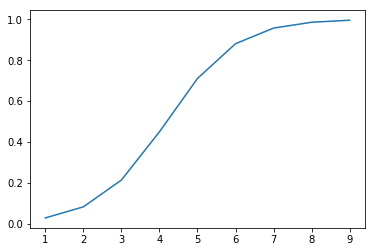

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(1, 10)
y = [ faulty_model(x0) for x0 in x ]

plt.plot(x,y)

# Problem 2
Let's consider weather to be a Markov process with the following transition probabilities:

| $w_0$  | $p(w_1 = \text{sunny})$ | $p(w_1 = \text{cloudy})$ | $p(w_1 = \text{rainy})$ |
|--------|-------------------------|--------------------------|-------------------------|
| sunny  | 0.8                     | 0.2                      | 0.0                     |
| cloudy | 0.4                     | 0.4                      | 0.2                     |
| rainy  | 0.2                     | 0.6                      | 0.2                     |

Suppose we have the following sequence:

* Day 1 : sunny
* Day 2 : cloudy
* Day 3 : cloudy
* Day 4 : rainy

We can assess the following probabilities:

$$
\begin{align}
p(w_2 = \text{cloudy}) = 0.2 \\
p(w_2 = \text{cloudy}, w_3 = \text{cloudy}) = 0.2 \cdot 0.4 = 0.08 \\
p(w_2 = \text{cloudy}, w_3 = \text{cloudy}, w_4 = \text{rainy}) = 0.2 \cdot 0.4 \cdot 0.2 = 0.016
\end{align}
$$

In studying a Markov process, we are typically interested in what the *steady-state probability distribution* is. We can determine this experimentally by collecting **lots** of data, or by writing a simulator.

In [3]:
from random import choices as draw
def tomorrowWeather(weather):
    if(weather == 'sunny'):
        return draw(['sunny', 'cloudy', 'rainy'], [0.8, 0.2, 0.0])
    elif(weather == 'cloudy'):
        return draw(['sunny', 'cloudy', 'rainy'], [0.4, 0.4, 0.2])
    else:
        return draw(['sunny', 'cloudy', 'rainy'], [0.2, 0.6, 0.2])

def simulateWeatherYears(years):
    current = ['sunny']
    days = years*365 # simulate years worth of data!
    dist = {'sunny' : 0, 'cloudy' : 0, 'rainy' : 0}

    for _ in range(days):
        current = tomorrowWeather(current[0])
        dist[current[0]] += 1

    print("Steady state probabilities for", years, "years are:")
    print("\tp(sunny) =  ", dist['sunny']/days)
    print("\tp(cloudy) = ", dist['cloudy']/days)
    print("\tp(rainy) =  ", dist['rainy']/days)

simulateWeatherYears(30)

Steady state probabilities for 30 years are:
	p(sunny) =   0.6307762557077625
	p(cloudy) =  0.29360730593607304
	p(rainy) =   0.07561643835616438


The problem with this approach is two-fold: We need to seed the initial day somehow, so this inherently skews the result. Lastly, since it is a stochastic process, it is possible for these probabilities to fluctuate!

In [4]:
simulateWeatherYears(30)
print("")
simulateWeatherYears(10000)

Steady state probabilities for 30 years are:
	p(sunny) =   0.651689497716895
	p(cloudy) =  0.27771689497716895
	p(rainy) =   0.07059360730593607

Steady state probabilities for 10000 years are:
	p(sunny) =   0.6433487671232877
	p(cloudy) =  0.28545753424657533
	p(rainy) =   0.07119369863013698


What would be most useful is a *closed form* calculation of the steady-state distribution. The simplest aproach would be to employ an analysis technique from Linear Algebra: solving for *eigen vectors*. First, a brief explanation...

Eigen Vectors have an interesting property that they are vectors which when linearly transformed change only in value by some scalar constant (except zero). That is to say,

$$
Ax = \lambda x
$$

In particular, $\lambda$ is defined as the *eigen value* associated with the eigen vector $x$. Therefore, in our case, we are looking for an eigen vector with an eigen value equal to 1 for our model:

$$
M = \begin{bmatrix}
p(\text{sunny} \: | \: \text{sunny}) & p(\text{sunny} \: | \: \text{cloudy}) & p(\text{sunny} \: | \: \text{rainy}) \\
p(\text{cloudy} \: | \: \text{sunny}) & p(\text{cloudy} \: | \: \text{cloudy}) & p(\text{cloudy} \: | \: \text{rainy}) \\
p(\text{rainy} \: | \: \text{sunny}) & p(\text{rainy} \: | \: \text{cloudy}) & p(\text{rainy} \: | \: \text{rainy}) \\
\end{bmatrix}
$$

$$
w = [ p(\text{sunny}) \: p(\text{cloudy}) \: p(\text{rainy}) ]^\top
$$

$$
Mw = w
$$

Based on the table above, $M$ is simply the transpose of that table. Rather than *deriving* the eigen vector, we'll use a SciPy module to calculate it.

In [5]:
from scipy import linalg

M = np.array([[0.8, 0.4, 0.2], [0.2, 0.4, 0.6], [0.0, 0.2, 0.2]], dtype=np.float64)

eVals, eVecs = linalg.eig(M)

v1 = eVecs[:,0].real # Solver *may* have added some complex components; those don't matter
v1 /= v1.sum() # Normalize

# print(eVals)
print(v1)

[0.64285714 0.28571429 0.07142857]


Those values look very similar to the ones above when we got 10000yrs worth of simulation, but not quite. To test, let's see how it works out:

In [6]:
print("M * v1 =")
v2 = M.dot(v1)
print(v2)

M * v1 =
[0.64285714 0.28571429 0.07142857]


Now, we should assess the entropy of this steady-state solution. Again, entropy is calculated as:
$$
H_p(x) = -\sum_x p(x) \log_2 p(x)
$$

\- Therefore -

In [7]:
lsum = 0.0
for p in v1:
    lsum += p * np.log2(p)

Hp = -1.0 * lsum
print("Hp =", Hp)

Hp = 1.1981174211304029


# Problem 3
Let's consider the case where we cannot directly observe the weather; instead we are using a sensor that is somewhat unreliable:

| $w$    | $p(w \: | \: z = \text{sunny})$ | $p(w \: | \: z = \text{cloudy})$ | $p(w \: | \: z = \text{rainy})$ |
|--------|---------------------------------|----------------------------------|---------------------------------|
| sunny  | 0.6                             | 0.4                              | 0.0                             |
| cloudy | 0.3                             | 0.7                              | 0.0                             |
| rainy  | 0.0                             | 0.0                              | 1.0                             |    

Let's suppose that we're observing a five-day period; we know that the weather on **Day 1 was sunny**. The subsequent days, the sensor observed **cloudy**, **cloudy**, **rainy**, **sunny**. We're interested in knowing what the actual probability of the 5th day is infact sunny.

Interestingly, we can notice a nice property with the sensor: there is no chance for the weather to be any other kind of state when the sensor says it's raining. This is a good *reset condition* for the sensor, because it forces the current measurement to be considered an independent observation. Likewise, when the sensor is not reporting that it's raining, there is no chance that the weather can be raining; the consequence is that any subsequent measurement after a rainy detection can also be considered an independent observation! Following this line of reasoning, we can confidently say that the sunny weather of the fifth day has a probability of 0.6.

There is another way we can consider this problem as well: we lack data regarding if the sensor has conditional effects upon itself. So, we could (and in absence of better information, *should*) consider each observation as independent. This still leaves us with the probability of 0.6.